**PA005: High Values Customer Identification ( Insiders )**

**0.0. Planejamento da Solução ( IOT )**

**Input - Entrada**

In [ ]:


Problema de Negócio
        -Selecionar os clientes mais valiosos para integrar um programa de Fidelização
Conjunto de Dados
        -Vendas de um e-commerce online, durante o periodo de um ano.



**Ouput - Saída**



    A indicação de pessoas para fazer parte do programa de fidelidade "INSIDERS".
        Lista: client_id | is_insider |

             10235 | yes/1
             25482 | no/0

    Relatório com as respostas para as seguintes perguntas:
        Quem são as pessoas elegíveis para participar do programa de Insiders ?
        Quantos clientes farão parte do grupo?Quais as principais características desses clientes ?
        Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
        Qual a expectativa de faturamento desse grupo para os próximos meses ?
        Quais as condições para uma pessoa ser elegível ao Insiders ?
        Quais as condições para uma pessoa ser removida do Insiders ?
        Qual a garantia que o programa Insiders é melhor que o restante da base ?
        Quais ações o time de marketing pode realizar para aumentar o faturamento?



**Task - Tarefas**



    O que é ser elegível ? O que é um cliente "valioso" para a empresa ?

    Faturamento:
        Alto Ticket Médio ( média de gastos )
        Alto LTV ( total de gasto )
        Baixa Recência ou Alta Frequência ( tempo entre as compras )
        Alto Basket Size ( quantidade média de produtos comprados )
        Baixa probabilidade de Churn
        Previsão alta de LTV
        Alta propensão de compra

    Custo:
        Baixo número de devoluções

    Experiência:
        Média alta de avaliações

Quantos clientes farão parte do grupo?

    Número de clientes
    % em relação ao total de clients

Quais as principais características desses clientes ?

    Escrever os principais atributos dos clientes
        Idade
        País
        Salário

    Escrever os principais comportamentos de compra dos clients ( métricas de negócio ) Vide acima



    Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
        Calcular o faturamento total da empresa durante o ano.
        Calcular o faturamento (%) apenas do cluster Insiders.

    Qual a expectativa de faturamento desse grupo para os próximos meses ?
        Cálculo do LTV do grupo InsidersSéries Temporais ( ARMA, ARIMA, HoltWinter, etc )

    Quais as condições para uma pessoa ser elegível ao Insiders ?
        Qual o período de avaliação ?
        O "desempenho" do cliente está próximo da média do cluster Insiders.

    Quais as condições para uma pessoa ser removida do Insiders ?
        O "desempenho" do cliente não está mais próximo da média do cluster Insiders.

    Qual a garantia que o programa Insiders é melhor que o restante da base ?
        Teste de Hipóteses
        Teste A/B

    Quais ações o time de marketing pode realizar para aumentar o faturamento?
        Descontos
        Preferências de escolha
        Produtos exclusivos


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
#from Ipython.display import HTML

import pandas as pd
#import inflection 
import math
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import time
from datetime import date
from datetime import timedelta
import seaborn as sns
import csv

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from scipy import stats as ss

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn import cluster as c
#from plotly import express as px

import pandas as pd
import numpy as np
import seaborn as sns

import umap.umap_ as umap

#from plotly import express as px

from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp

from IPython.display     import HTML
from matplotlib          import pyplot as plt

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer 
from pandas_profiling import ProfileReport

ModuleNotFoundError: ignored

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()    


jupyter_settings()


Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 25.7 MB/s 
     |████████████████████████████████| 18.2 MB 36.0 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=d51a61d3f4dba3f6e0373de5aa85df8b1e843b211dc0201902779d12830e342d
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=1a35e17ff6066f3c1beacc64b8874a2689f1e355a2141aac2de7f513ef684ebc
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=e20dda5443d35bb0ade531b7c585d9831d57dac6599b5e522

In [ ]:
df_raw = pd.read_csv('/content/Ecommerce.csv', encoding='latin1')
#drop extra column
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

NameError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ecommerce.csv to Ecommerce.csv


**0.1. Helper Functions**

**0.2. Load dataset**

**1.0. Descrição dos dados**

In [ ]:
df0 = df_raw.copy()

NameError: ignored

**1.1. Rename columns**

In [ ]:
df0.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df0.columns = cols_new

In [ ]:
df0.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


**1.2. Data dimensions**

In [ ]:
print('Number of Rows: {}'.format( df0.shape[0] ) )
print('Number of Cols: {}'.format( df0.shape[1] ) )

Number of Rows: 541909
Number of Cols: 8


**1.3. Data Types**

In [ ]:
df0.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [ ]:
df_raw['invoice_no'] = df_raw['invoice_no'].astype( int )
df_raw['stock_code'] = df_raw['stocke_code'].astype( int )


**1.4. Check NA**

In [ ]:
df0.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

**1.5. Replace NA**

In [ ]:
#df0 = df0.dropna(subset=['description', 'customer_id'])
#print('Removed date: {:.2f}'.format( 1-( df0.shape[0]/ df_raw.shape[0]) ) )

#df_missing = df0.loc[df0['customer_id'].isna(), :]
#df_not_missing = df0.loc[~df0['customer_id'].isna(), :]

In [ ]:
df_missing = df0.loc[df0['customer_id'].isna(), :]
df_not_missing = df0.loc[~df0['customer_id'].isna(), :]

In [ ]:
# crate reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup), 1)

# merge original with reference data frame
df0 = pd.merge( df0, df_backup, on='invoice_no', how='left')

# coalesce
df0['customer_id'] = df0['customer_id_x'].combine_first( df0['customer_id_y'] )

# drop extra columns
df0 = df0.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

df0.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [ ]:
df0.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [ ]:
# crate reference
#missing_invoice = df_missing['invoice_no'].drop_duplicates().tolist()
#missing_invoice[0:10]

In [ ]:
#remova na
#df0 = df0.dropna( subset=['description', 'customer_id'] )
#print('Removed data: {:.2f}'.format( 1-( df0.shape[0]/df_raw.shape[0] ) ) )

**1.6. Change dtypes**

In [ ]:
#invoice date
df0['invoice_date'] = pd.to_datetime( df0['invoice_date'], format= '%d-%b-%y' )
df0.head()

#customer id
df0['customer_id'] = df0['customer_id'].astype(int)
df0.head()



,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [ ]:
df0.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

**1.7. Descriptive Statistics**

In [ ]:
#1.7. Descriptive Statistics
num_attributes = df0.select_dtypes( include=['int64', 'float64'])
cat_attributes = df0.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])


In [ ]:
#1.7.1 Numerical Attributs

# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287



1.7.1.1 Numerical Attributs - Investigating

    Quantity negativa ( pode ser devolução )

    Preço unitário igual a zero ( pode ser promoção )



In [ ]:
#filtragens de variaveis
df1 = df0.copy()

In [ ]:
#1.7.2 categorical attributs

In [ ]:
import re
# 1.7.2 Categorical Attributs
#invoice no

# invoice number
# problema: invoice com letras e numeros

df_letter_invoices = df1.loc[ df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), : ]
df_letter_invoices.head()

print('Total de number of invoices: {} '.format( len( df_letter_invoices ) ) )

print('Total de number of negative quantity: {} '.format( len( df_letter_invoices[ df_letter_invoices["quantity"] < 0])))

#print( f'Total de number of invoices: { len( df_letter_invoices )}')

#print(f'Total de number of negative quantity: {len( df_letter_invoices[ df_letter_invoices["quantity"] < 0])}')


Total de number of invoices: 9291 
Total de number of negative quantity: 9288 


In [ ]:


# check stock codes only characters
df1.loc[ df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ),'stock_code'].unique()


array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [ ]:
#description
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [ ]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df1['country'].value_counts( normalize=True ).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [ ]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country').count().reset_index().sort_values( 'customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


In [ ]:
#STOCK CODE

In [ ]:
#FILTRAGEM DE VARIAVEIS 

In [ ]:
#depois de oaises
#3.0 filtragem de variaveis
df2 = df1.copy()

In [ ]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [ ]:
# === Numerical attributes ===
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# === Categorical attributes ===
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE','DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm','gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0069',
       'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004','DCGS0073', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'] ) ]

# description, nao sei se é relevante
df2 = df2.drop( columns='description', axis=1 )

# map
df2['country'].isin( ['Unspecified', 'European Community'])

#bad user
#df2 = df2 (~df2['customer_id'].isin[16446])

# quantity - Rivisão entre compra e decolução
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchase = df2.loc[df2['quantity'] >= 0, :]


In [ ]:
#FEATURE ENGINEERING

In [ ]:
df3 = df2.copy()

**##TESTE**

In [ ]:
#feature selection
df4 = df3.copy()
#df4_aux = df3.copy()



In [ ]:
df4.head()

In [ ]:
mm = pp.MinMaxScaler()
ss = pp.StandardScaler()
rs = pp.RobustScaler()


df4['gross_revenue']          = mm.fit_transform( df4[['gross_revenue']])
#df4['recency_days']           = mm.fit_transform( df4[['recency_days']])
#df4['qtde_invoices']          = mm.fit_transform( df4[['qtde_invoices']])
#df4['qtde_items']             = mm.fit_transform( df4[['qtde_items']])
#df4['qtde_products']          = mm.fit_transform( df4[['qtde_products']])
#df4['avg_ticket']             = mm.fit_transform( df4[['avg_ticket']])
#df4['avg_recency_days']       = mm.fit_transform( df4[['avg_recency_days']])
#df4['frequency']              = mm.fit_transform( df4[['frequency']])
#df4['qtde_returns']           = mm.fit_transform( df4[['qtde_returns']])
#df4['avg_basket_size']        = mm.fit_transform( df4[['avg_basket_size']])
#df4['avg_unique_basket_size'] = mm.fit_transform( df4[['avg_unique_basket_size']])
variable = 'gross_revenue'


In [ ]:

#3 feature creation and reference
df_ref = df3.drop( ['invoice_no', 'stock_code',
                   'quantity', 'invoice_date', 'unit_price', 
                   'country'], axis=1 ).drop_duplicates( ignore_index=True)

# Gross Revenue/Faturamento , quantity + price

In [ ]:
# Gross Revenue/Faturamento , quantity + price
df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] = df2_purchase.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id       0
gross_revenue    67
dtype: int64

In [ ]:
# Recency - Last day purchase
df_recency = df2_purchase.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum() # -> Check NA apos merge



customer_id       0
gross_revenue    67
recency_days     67
dtype: int64

In [ ]:
# quantity of purchased
#df_freq = df2_purchase.loc[:,['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
#df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')
#df_ref.isna().sum()





In [ ]:
#quantity of purchased- quantidade de produtos
df_freq = (df2_purchase.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                                               .groupby( 'customer_id' )
                                                                               .count()
                                                                               .reset_index()
                                                                               .rename( columns={'invoice_no': 'qtde_invoices'}))
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )  
df_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
dtype: int64

In [ ]:
# quantity of items purchased
#df_freq = df2_purchase.loc[:,['customer_id', 'quantity']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
#df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')
#df_ref.isna().sum()

In [ ]:


# quantity of items purchased
df_freq = (df2_purchase.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'}))
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()



customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
dtype: int64

In [ ]:
#quantity of products purchased
df_freq = (df2_purchase.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' )
                                                              .count()
                                                              .reset_index()
                                                              .rename( columns={'stock_code': 'qtde_products'}))
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
qtde_products    67
dtype: int64

In [ ]:
#avg ticket value
df_avg_ticket = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
qtde_products    67
avg_ticket       67
dtype: int64

In [ ]:
# 3.1.6. Average Recency Days

# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending = ['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

df2.loc[df2['customer_id'] == 17850, ['invoice_no', 'invoice_date']].drop_duplicates()

,invoice_no,invoice_date
0,536365,2016-11-29
7,536366,2016-11-29
47,536372,2016-11-29
49,536373,2016-11-29
66,536375,2016-11-29
84,536377,2016-11-29
278,536396,2016-11-29
315,536399,2016-11-29
416,536406,2016-11-29
433,536407,2016-11-29


In [ ]:
df2_max = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').max()
df2_min = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').min()
df2_purchase = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').count()

In [ ]:
#frequency purchase



df_aux = ( df2_purchase[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                                    .groupby( 'customer_id')
                                                                    .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                          min_ = ( 'invoice_date', 'min' ),
                                                                          days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                          buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()



customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
qtde_products         67
avg_ticket            67
avg_recency_days    2800
frequency             67
dtype: int64

In [ ]:
#number of returns

# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()


customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
qtde_products         67
avg_ticket            67
avg_recency_days    2800
frequency             67
qtde_returns           0
dtype: int64

In [ ]:
#basket size


#3.1.9. Basket Size - Quantidade de Items por Cesta ( Quantity )

    #Invoice No = Compra = purchase
    #Stock Code = Produto = Product
    #Quantity = Item = Item



df_aux = ( df2_purchase.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id')
                                                                          .agg( n_purchases=( 'invoice_no', 'nunique'),
                                                                                n_products=( 'quantity', 'sum'))
                                                                           .reset_index())
# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchases']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
qtde_products         67
avg_ticket            67
avg_recency_days    2800
frequency             67
qtde_returns           0
avg_basket_size       67
dtype: int64

In [ ]:
#Unique Basket Size - Quantidade de produtos distinto por compra

df_aux = ( df2_purchase.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id')
                                                                          .agg( n_purchases=( 'invoice_no', 'nunique'),
                                                                                n_products=( 'stock_code', 'nunique')) #colocar nunique
                                                                           .reset_index())
# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchases']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()



customer_id                  0
gross_revenue               67
recency_days                67
qtde_invoices               67
qtde_items                  67
qtde_products               67
avg_ticket                  67
avg_recency_days          2800
frequency                   67
qtde_returns                 0
avg_basket_size             67
avg_unique_basket_size      67
dtype: int64

In [ ]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,1176.23,372.0,34.0,1176.23,297.0,3.960370,35.500000,17.000000,40.0,34.595000,0.617647
1,13047,671.36,56.0,9.0,671.36,171.0,3.926082,27.250000,0.028302,35.0,74.595556,11.666667
2,12583,496.59,2.0,15.0,496.59,232.0,2.140474,23.187500,0.040323,50.0,33.106000,7.600000
3,13748,111.90,95.0,5.0,111.90,28.0,3.996429,92.666667,0.017921,0.0,22.380000,4.800000
4,15100,32.85,333.0,3.0,32.85,3.0,10.950000,8.600000,0.073171,22.0,10.950000,0.333333


In [ ]:
#4.0 EDA
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

In [ ]:
#univariate analysis
import pandas_profiling
profile = ProfileReport( df4 )
profile.to_file( 'output_vl.html')




In [ ]:

#4.1.1 Gross Revenue

df4.sort_values( 'gross_revenue', ascending=False ).head()



,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
4394,14096,21426.09,4.0,17.0,21426.09,5095.0,4.205317,6.062500,0.173469,0.0,1260.358235,65.764706
68,17841,19834.29,1.0,124.0,19834.29,7838.0,2.530529,3.321429,0.332440,203.0,159.953952,10.661290
66,14911,18636.38,1.0,198.0,18636.38,5589.0,3.334475,2.601399,0.530831,3331.0,94.123131,9.015152
47,12748,10880.23,0.0,206.0,10880.23,4580.0,2.375596,3.330357,0.550802,1535.0,52.816650,8.572816
96,14606,7550.75,1.0,90.0,7550.75,2697.0,2.799685,4.275862,0.241287,245.0,83.897222,9.066667


In [ ]:
#gross revenue
#quantidade de itens
#df4[df4['qtde_items'] == 196844]
df3[df3['customer_id'] == 14646].head()



,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646


In [ ]:
#quantidade de produto/itens
df4[df4['qtde_items'] == 21426.09]
#df3[df3['customer_id'] == 17841].head()



,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
4394,14096,21426.09,4.0,17.0,21426.09,5095.0,4.205317,6.0625,0.173469,0.0,1260.358235,65.764706


In [ ]:
#frequency
df3[df3['customer_id'] == 17850]


,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,6,2016-11-29,1.85,United Kingdom,17850
47,536372,22632,6,2016-11-29,1.85,United Kingdom,17850


In [ ]:
#avg ticket
df4[df4['avg_ticket'] == 56157.5]

#df3[df3['customer_id'] == 16446]



,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


In [ ]:
#averange basket size
df4[df4['avg_basket_size'] == 40498.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


In [ ]:
#df3[df3['customer_id'] == 17850].sort_values('quantity', ascending=False).head(30)]]

In [ ]:
#frequency
#df4[df4['frequency'] == 17 ]

In [ ]:
#bivariate analysis
cols = ['customer_id']
df42 = df4.drop(cols, axis = 1 )


4.2. Bivariate Analysis

<Figure size 1800x864 with 0 Axes>

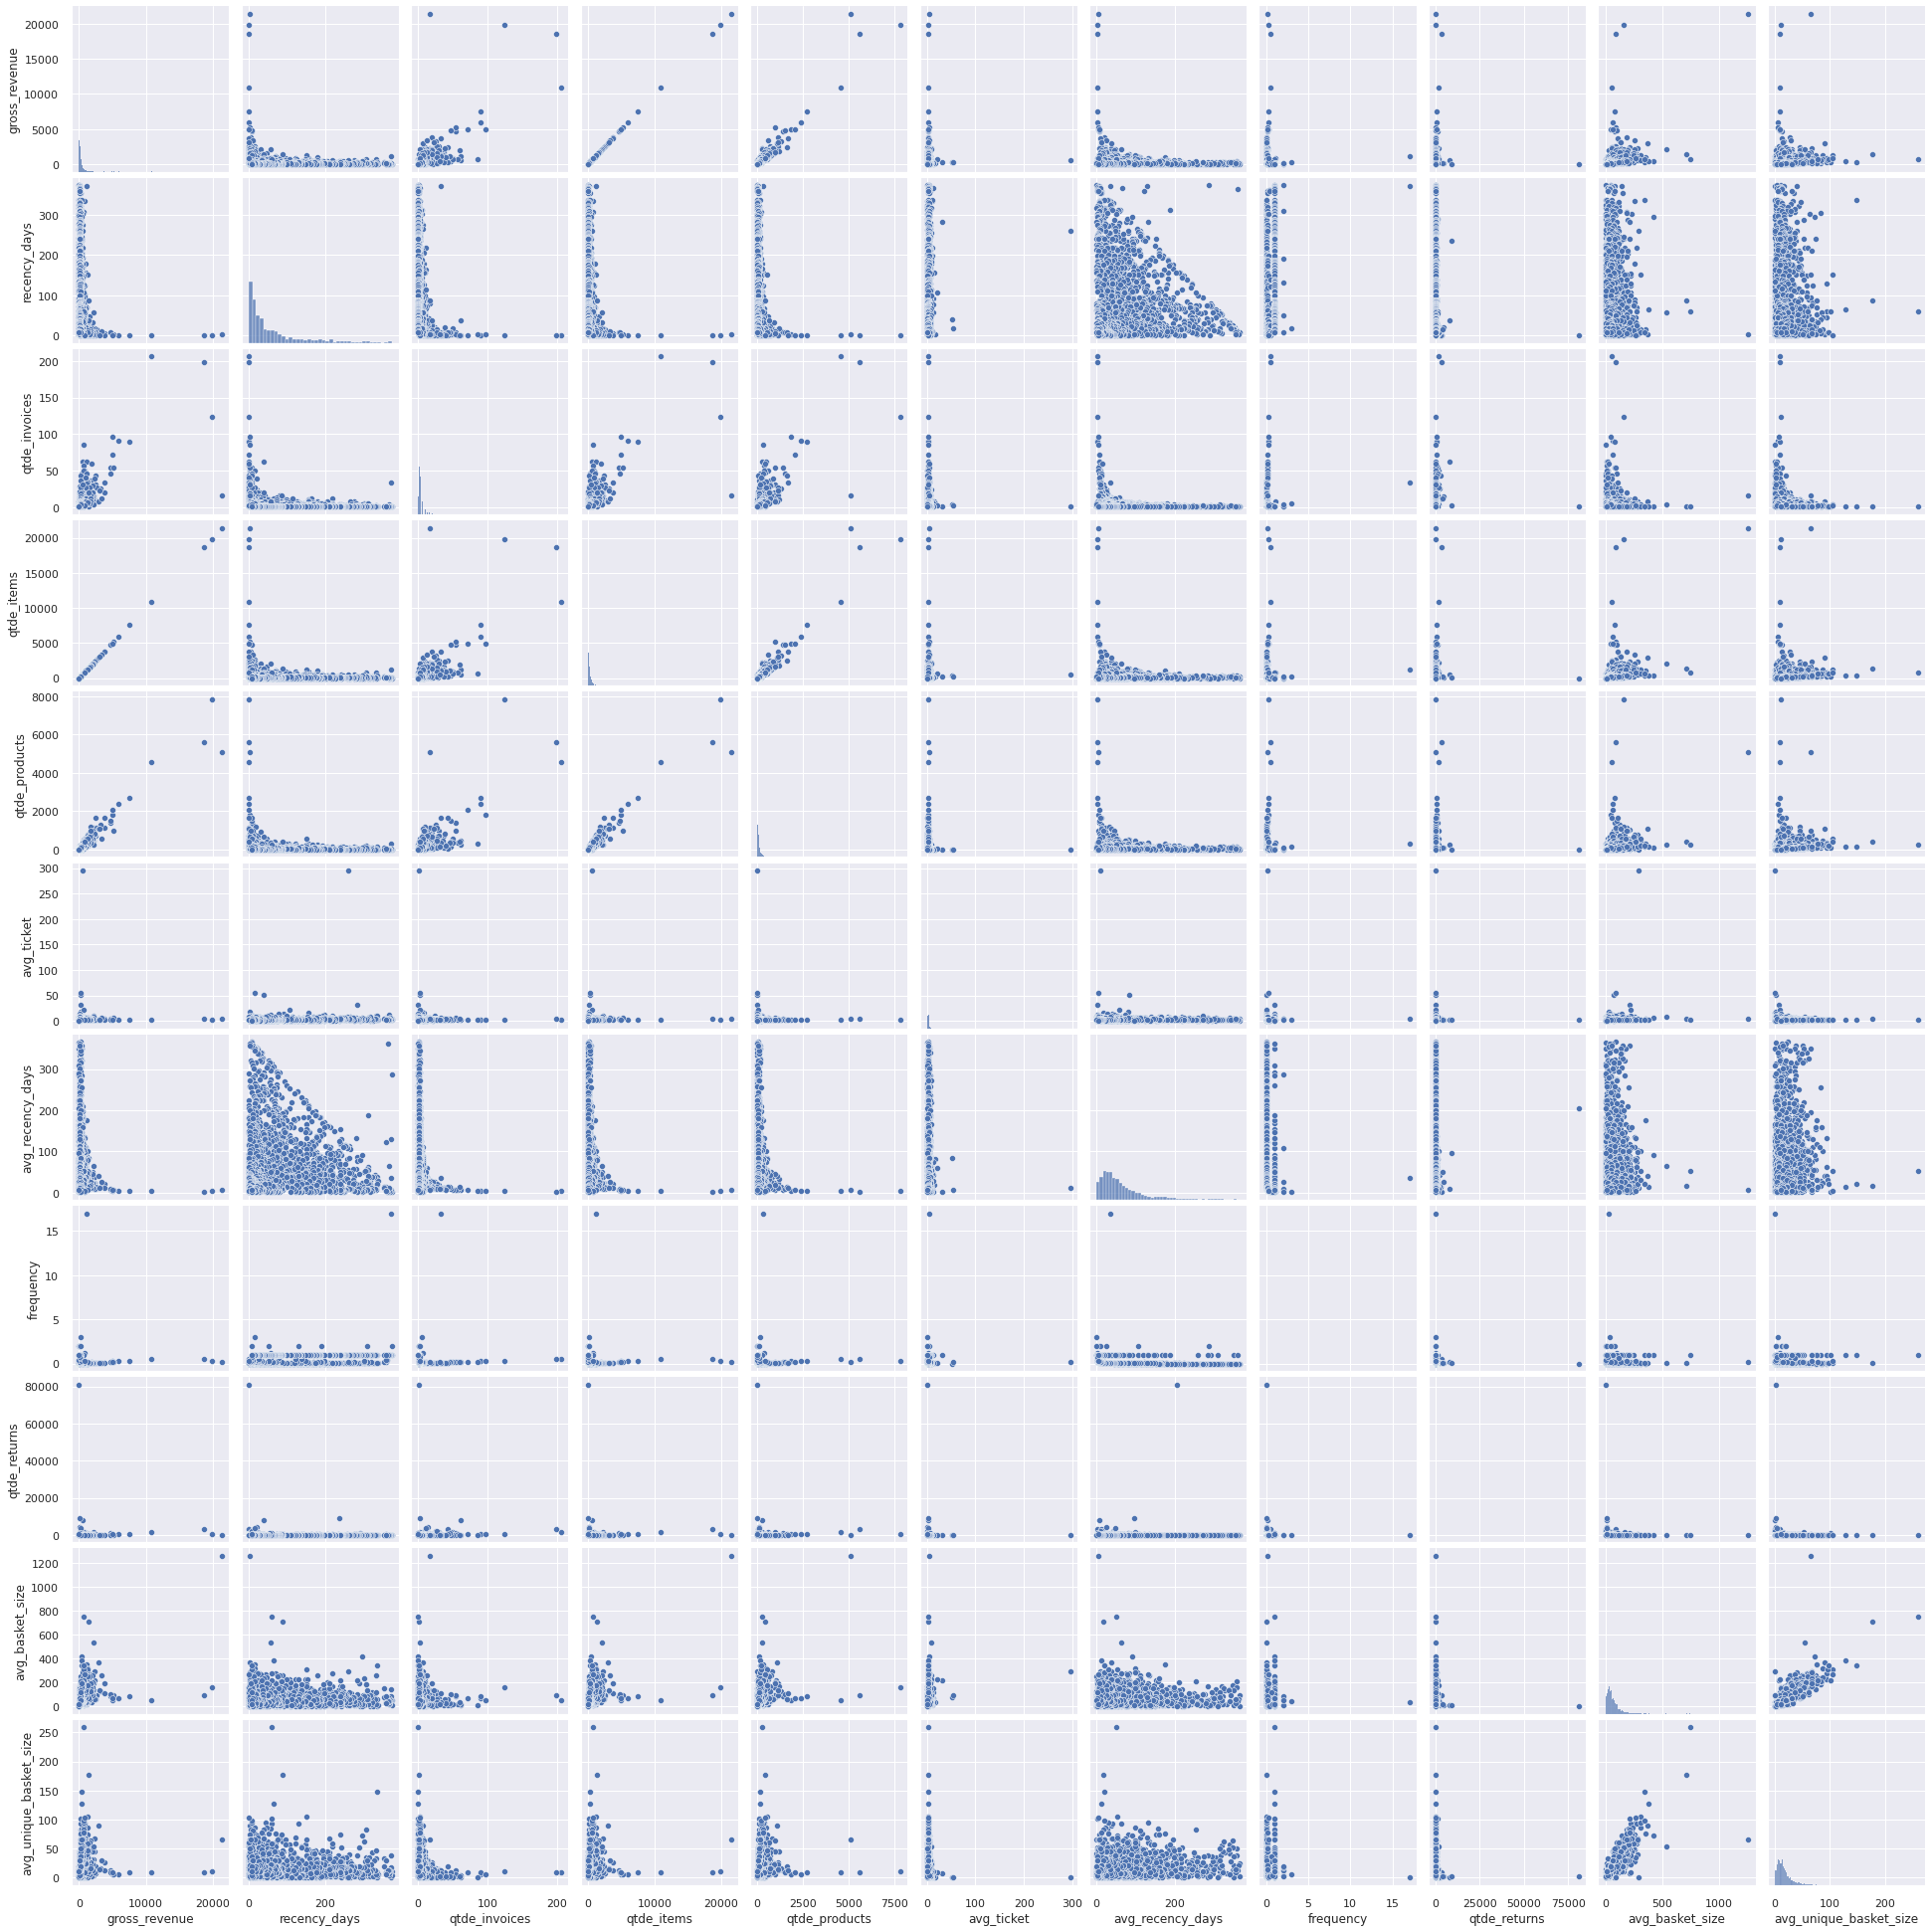

In [ ]:
plt.figure( figsize=( 25, 12 ))
sns.pairplot( df42 )


ESTUDO DO ESPAÇO

In [ ]:
df42 = df4.drop( columns=['customer_id'], axis=1 ).copy()

In [ ]:
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df43 = df4[ cols_selected].copy()

In [ ]:
df43.columns #selecionar essa e nao a 42

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_products',
       'frequency', 'qtde_returns'],
      dtype='object')

In [ ]:
df43 = df42.copy()

In [ ]:
from sklearn import metrics       as mm

from sklearn import preprocessing as pp

In [ ]:
mm = pp.MinMaxScaler()

df43['gross_revenue']          = mm.fit_transform( df43[['gross_revenue']])
df43['recency_days']           = mm.fit_transform( df43[['recency_days']])
#df43['qtde_invoices']          = mm.fit_transform( df43[['qtde_invoices']])
#df43['qtde_items']             = mm.fit_transform( df43[['qtde_items']])
df43['qtde_products']          = mm.fit_transform( df43[['qtde_products']])
#df43['avg_ticket']             = mm.fit_transform( df43[['avg_ticket']])
#df43['avg_recency_days']       = mm.fit_transform( df43[['avg_recency_days']])
df43['frequency']              = mm.fit_transform( df43[['frequency']])
df43['qtde_returns']           = mm.fit_transform( df43[['qtde_returns']])
#df43['avg_basket_size']        = mm.fit_transform( df43[['avg_basket_size']])
#df43['avg_unique_basket_size'] = mm.fit_transform( df43[['avg_unique_basket_size']])

X = df43.copy()


In [ ]:
X.shape

(2970, 6)

In [ ]:
clusters = [2, 3, 4, 5, 6, 7]

4.3.1. PCA

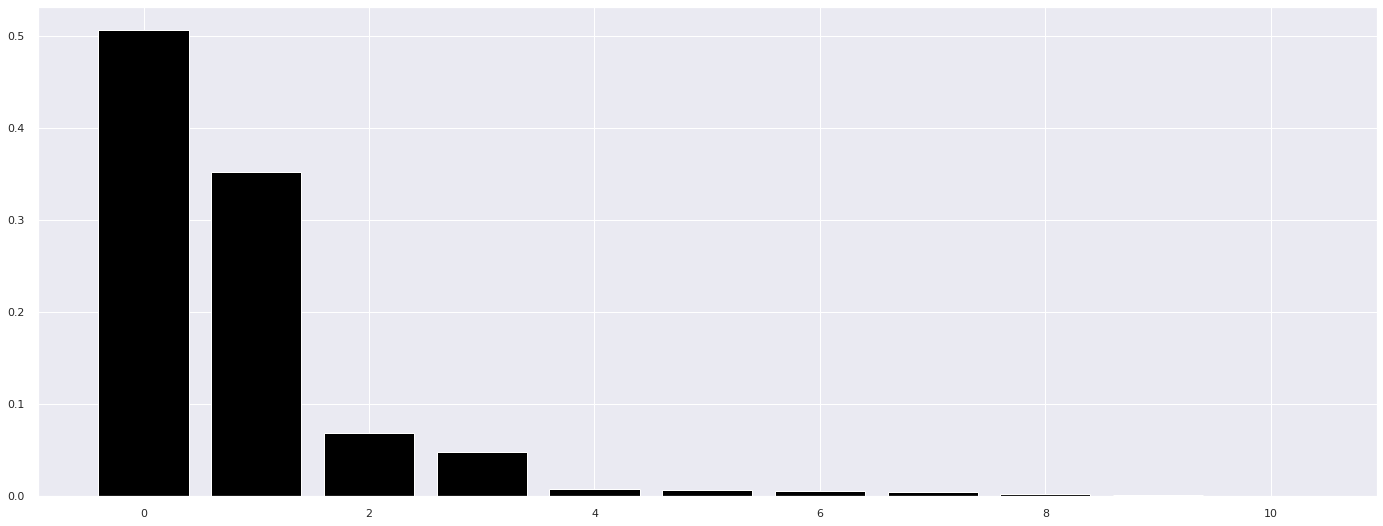

In [ ]:
from sklearn import decomposition as dd

pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

#plot explained variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_, color='black')

# pca component
df_pca = pd.DataFrame( principal_components )

In [ ]:
from sklearn import decomposition as dd

pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

#plot explained variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_, color='black')

# pca component
df_pca = pd.DataFrame( principal_components )

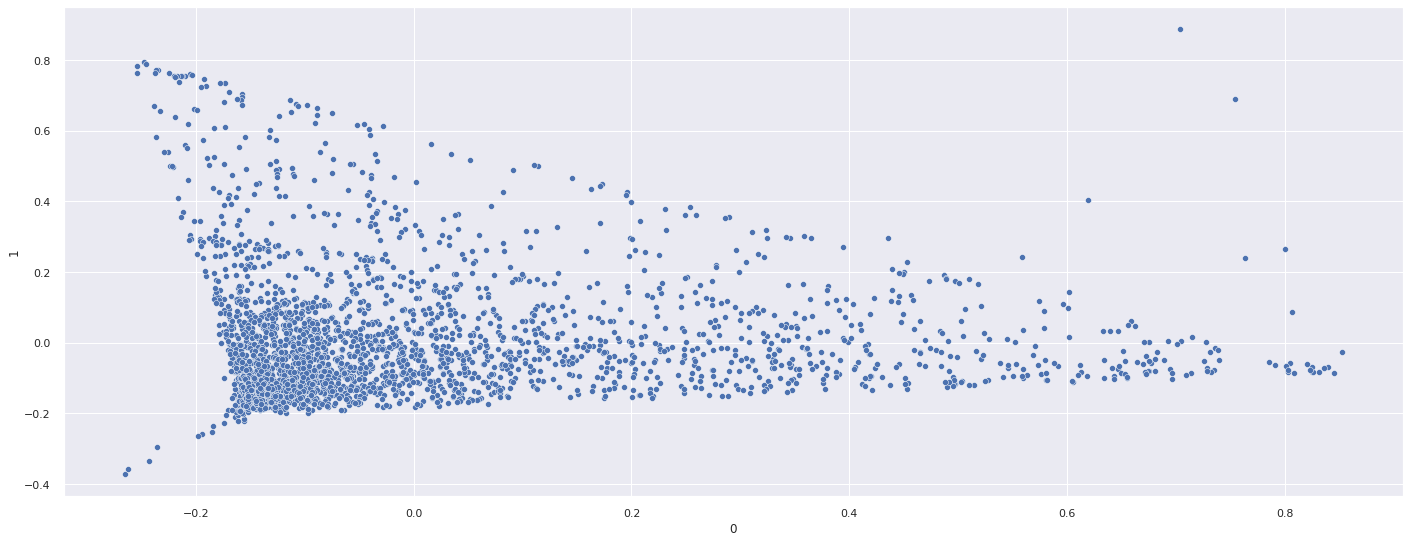

In [ ]:

import seaborn as sns
sns.scatterplot( x=0, y=1, data=df_pca)



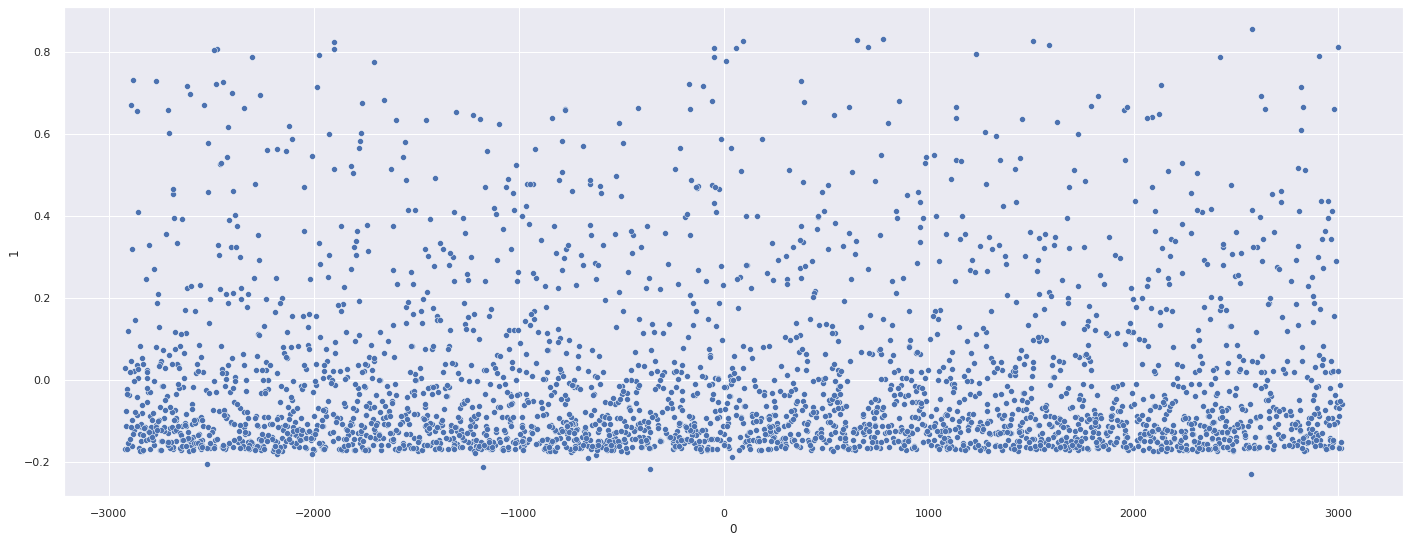

In [ ]:
import seaborn as sns
sns.scatterplot( x=0, y=1, data=df_pca)



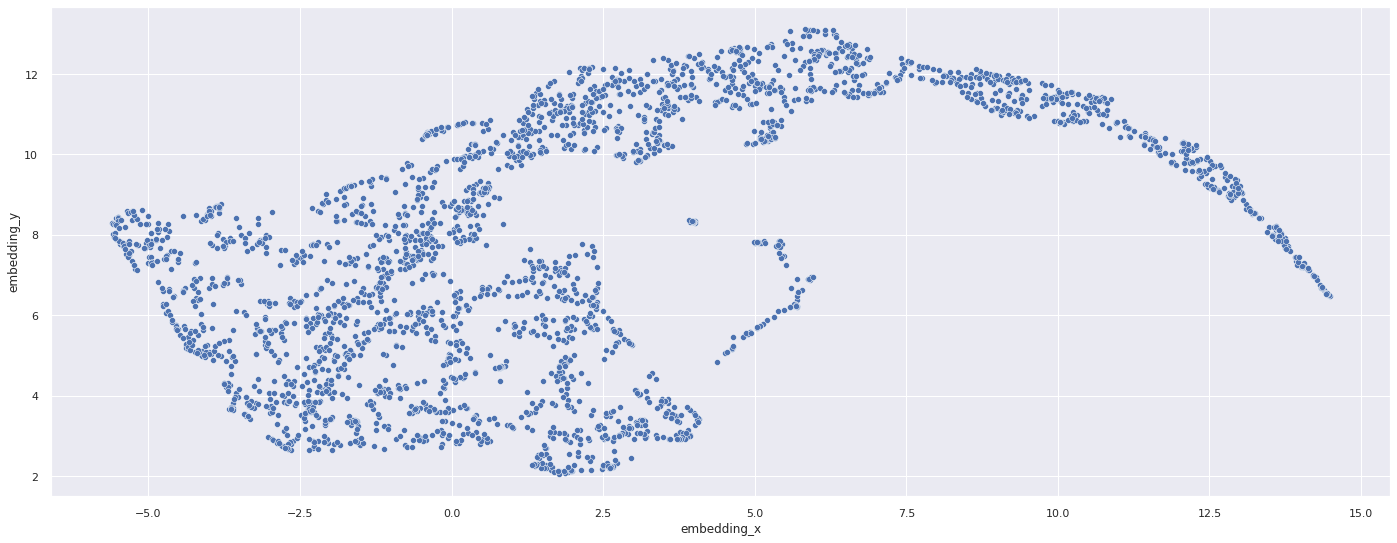

In [ ]:
#UMAP
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y',
                 data=df_pca )

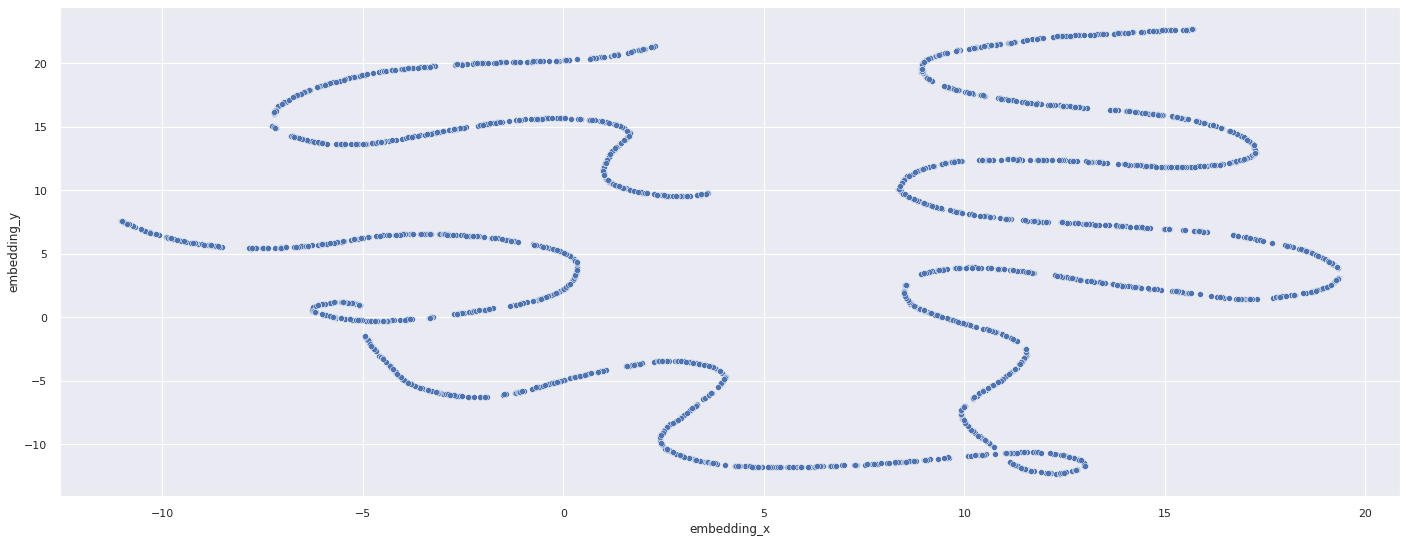

In [ ]:
#UMAP
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y',
                 data=df_pca)

In [ ]:
from sklearn.manifold import TSNE
from sklearn import manifold as mn

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


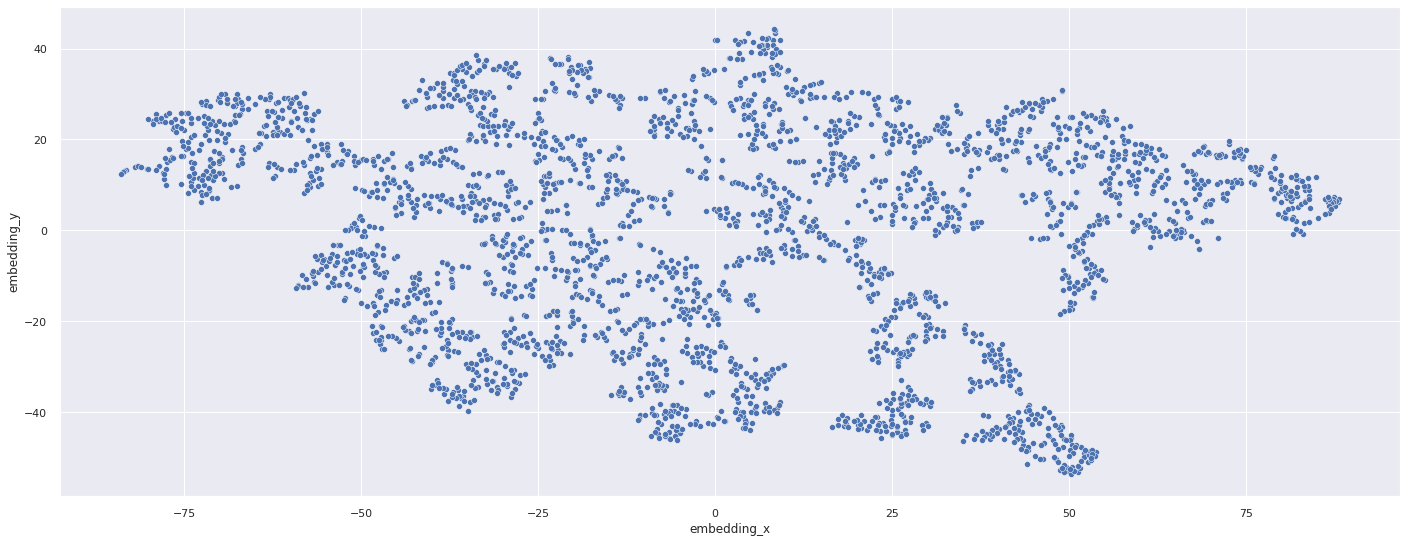

In [ ]:
#SNE
reducer = mn.TSNE(n_components=2, n_jobs= -1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y',
                 data=df_pca )

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


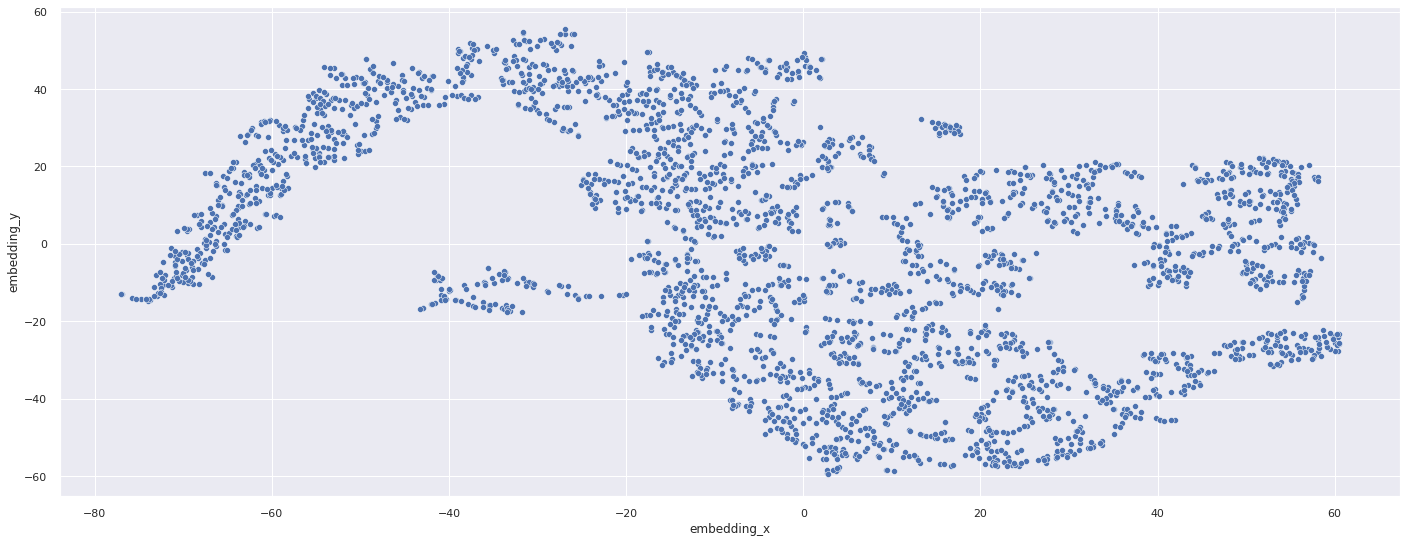

In [ ]:
#SNE
reducer = mn.TSNE(n_components=2, n_jobs= -1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y',
                 data=df_pca )

4.3.3 Tree-Based Embedding

In [ ]:
from sklearn import ensemble      as en
from sklearn import preprocessing as pp
# training dataset
X = df4.drop( columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )

# Leaf

# dataframe

RandomForestRegressor(random_state=42)

In [ ]:
df4.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,1176.23,372.0,34.0,1176.23,297.0,3.960370,35.500000,17.000000,40.0,34.595000,0.617647
1,13047,671.36,56.0,9.0,671.36,171.0,3.926082,27.250000,0.028302,35.0,74.595556,11.666667
2,12583,496.59,2.0,15.0,496.59,232.0,2.140474,23.187500,0.040323,50.0,33.106000,7.600000
3,13748,111.90,95.0,5.0,111.90,28.0,3.996429,92.666667,0.017921,0.0,22.380000,4.800000
4,15100,32.85,333.0,3.0,32.85,3.0,10.950000,8.600000,0.073171,22.0,10.950000,0.333333


In [ ]:
from sklearn import ensemble      as en
from sklearn import preprocessing as pp
# training dataset
X = df4.drop( columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )

# Leaf

# dataframe

RandomForestRegressor(random_state=42)

In [ ]:
df_leaf = pd.DataFrame( rf_model.apply( X ) )


In [ ]:
X.shape

(2970, 10)

In [ ]:
df_leaf.shape


(2970, 100)

In [ ]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3575,3566,3550,3571,3514,3588,3517,3527,3603,3546,...,3530,3510,3510,3520,3557,3554,3533,3570,3536,3578
1,3260,3255,3251,3259,3207,3258,3218,3205,3321,3223,...,3219,3205,3226,3217,3251,3244,3233,3259,3210,3278
2,2996,3029,3019,3025,2966,3023,2971,2966,3063,2976,...,2993,2960,2957,2961,3007,2988,3000,3019,2980,3037
3,1173,1190,1213,1168,1185,1180,1167,1140,1189,1144,...,1146,1168,1139,1140,1181,1175,1176,1216,1119,1217
4,314,305,322,309,320,307,306,288,341,302,...,288,295,272,294,295,302,297,300,296,313


In [ ]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3575,3566,3550,3571,3514,3588,3517,3527,3603,3546,3574,3472,3553,3605,3541,3517,3577,3557,3548,3468,3568,3563,3542,3504,3573,3557,3476,3513,3511,3636,3505,3564,3563,3563,3540,3570,3611,3541,3495,3469,3568,3530,3604,3574,3579,3531,3496,3579,3618,3521,3558,3592,3539,3591,3602,3550,3563,3651,3518,3555,3577,3505,3528,3578,3544,3539,3562,3548,3533,3552,3575,3589,3567,3539,3569,3558,3579,3515,3611,3537,3486,3495,3540,3532,3516,3565,3543,3597,3519,3504,3530,3510,3510,3520,3557,3554,3533,3570,3536,3578
1,3260,3255,3251,3259,3207,3258,3218,3205,3321,3223,3268,3176,3256,3278,3233,3241,3263,3259,3249,3162,3256,3231,3232,3184,3273,3264,3153,3204,3194,3322,3181,3244,3253,3252,3231,3253,3284,3223,3197,3154,3270,3223,3312,3276,3294,3232,3191,3268,3319,3228,3229,3299,3223,3248,3281,3262,3250,3352,3210,3250,3253,3198,3248,3282,3239,3243,3254,3239,3226,3258,3276,3278,3238,3240,3272,3230,3255,3185,3284,3237,3181,3171,3243,3235,3196,3261,3252,3275,3199,3196,3219,3205,3226,3217,3251,3244,3233,3259,3210,3278
2,2996,3029,3019,3025,2966,3023,2971,2966,3063,2976,3019,2939,3000,3028,3016,3010,3008,3014,3024,2927,3022,3013,2999,2959,3035,3026,2930,2989,2952,3071,2943,2994,3021,3006,3010,2994,3023,2989,2965,2922,3061,2995,3056,3027,3048,2990,2948,3040,3074,2990,2972,3038,2975,2999,3030,3023,3008,3096,2968,3021,3031,2957,3025,3069,2991,3011,3007,3009,3005,2998,3026,3047,2987,2994,3018,3002,3022,2944,3034,2990,2956,2942,3014,2979,2961,3012,3013,3035,2972,2962,2993,2960,2957,2961,3007,2988,3000,3019,2980,3037
3,1173,1190,1213,1168,1185,1180,1167,1140,1189,1144,1171,1186,1178,1236,1197,1141,1203,1153,1143,1118,1218,1205,1224,1158,1178,1167,1130,1181,1155,1196,1142,1119,1174,1183,1184,1205,1162,1185,1176,1129,1209,1122,1189,1150,1218,1184,1186,1221,1210,1146,1180,1218,1199,1159,1191,1169,1158,1212,1171,1191,1182,1160,1185,1203,1175,1195,1201,1182,1198,1182,1181,1185,1162,1178,1181,1181,1209,1146,1176,1154,1141,1190,1184,1185,1193,1203,1151,1217,1151,1157,1146,1168,1139,1140,1181,1175,1176,1216,1119,1217
4,314,305,322,309,320,307,306,288,341,302,296,295,323,336,306,284,305,301,294,297,316,322,311,313,310,281,303,319,299,297,287,274,302,326,305,324,306,315,298,288,298,290,329,291,299,280,299,316,313,278,316,317,323,328,299,315,305,302,287,306,301,288,289,315,313,304,307,298,334,297,313,317,302,294,301,294,328,302,311,295,289,293,307,314,316,315,293,311,299,311,288,295,272,294,295,302,297,300,296,313


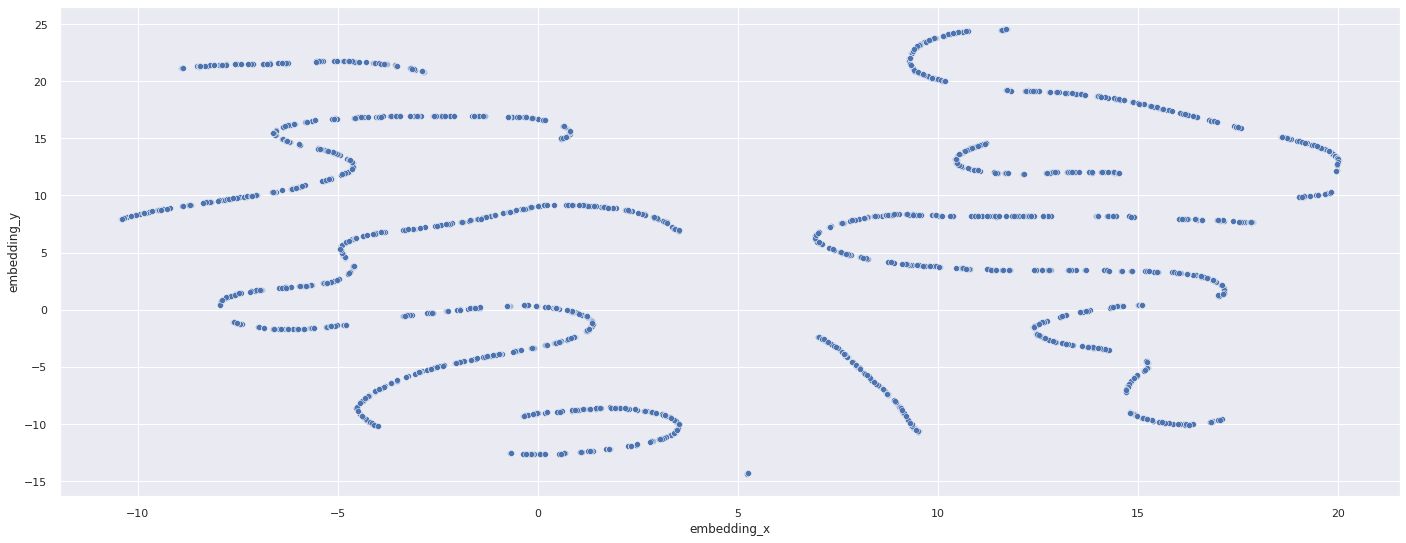

In [ ]:
#reducer dimensionality
reducer = umap.UMAP( random_state = 42)
embedding = reducer.fit_transform( df_leaf)

#embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x='embedding_x',
                y='embedding_y',
                data=df_pca )

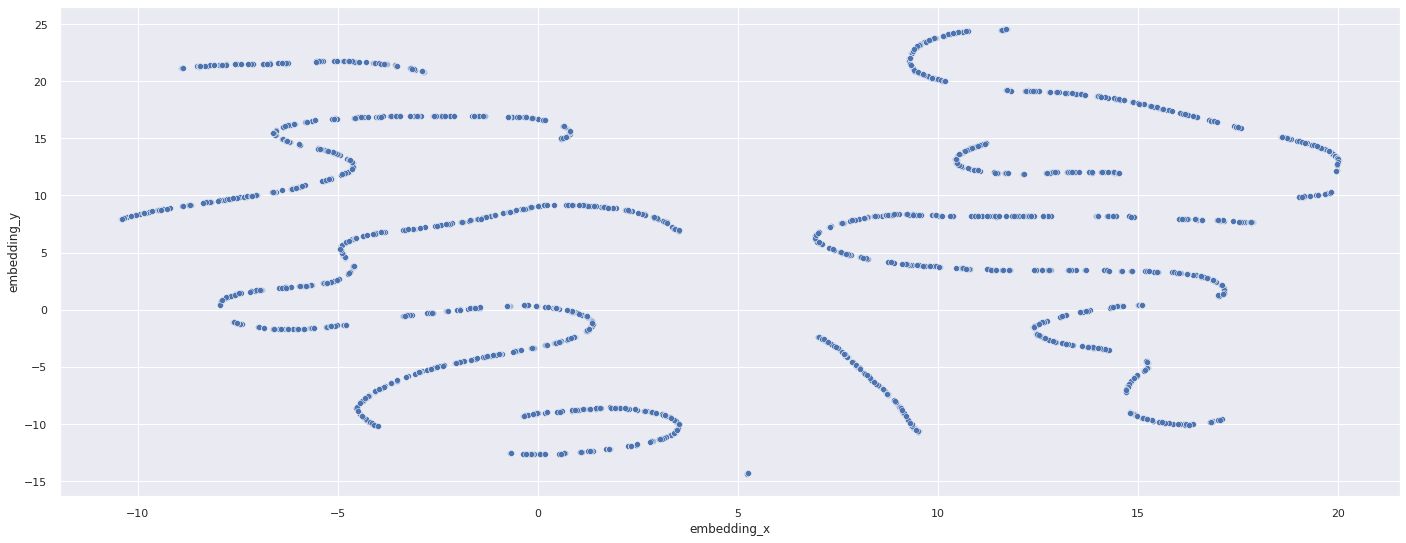

In [ ]:
#reducer dimensionality
reducer = umap.UMAP( random_state = 42)
embedding = reducer.fit_transform( df_leaf)

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x='embedding_x',
                y='embedding_y',
                data=df_tree )

In [ ]:
#reducer dimensionality
reducer = umap.UMAP( random_state = 42)
embedding = reducer.fit_transform( df_leaf)

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot( x='embedding_x',
                y='embedding_y',
                data=df_tree )

In [ ]:
#feature selection
df5 = df4.copy()
#df5_aux = df4.copy()



In [ ]:
#feature selection
#df5 = df4.copy()
df5 = df_tree.copy()



In [ ]:

mm = pp.MinMaxScaler()
ss = pp.StandardScaler()
rs = pp.RobustScaler()

df5['gross_revenue']          = mm.fit_transform( df5[['gross_revenue']])
df5['recency_days']           = mm.fit_transform( df5[['recency_days']])
df5['qtde_invoices']          = mm.fit_transform( df5[['qtde_invoices']])
df5['qtde_items']             = mm.fit_transform( df5[['qtde_items']])
df5['qtde_products']          = mm.fit_transform( df5[['qtde_products']])
df5['avg_ticket']             = mm.fit_transform( df5[['avg_ticket']])
df5['avg_recency_days']       = mm.fit_transform( df5[['avg_recency_days']])
df5['frequency']              = mm.fit_transform( df5[['frequency']])
df5['qtde_returns']           = mm.fit_transform( df5[['qtde_returns']])
df5['avg_basket_size']        = mm.fit_transform( df5[['avg_basket_size']])
df5['avg_unique_basket_size'] = mm.fit_transform( df5[['avg_unique_basket_size']])
variable = 'recency_days'


In [ ]:
#dados as is
print( 'Min:{} - Max:{}'.format(df5[variable].min(), df5[variable].max() ) )

Min:0.0 - Max:1.0


In [ ]:
#seleção de features
cols_selected = ['customer_id', 'gross_revenue','recency_days', 'qtde_products', 'frequency', 'qtde_returns']

In [ ]:
df6 = df_tree.copy()

In [ ]:
#hiper finin tunin
X = df_tree.copy()

In [ ]:
X.head()

,embedding_x,embedding_y
0,9.908576,20.240759
1,19.732059,10.182868
2,17.044334,7.803576
3,-5.687453,-1.625992
4,-3.099422,16.960051


In [ ]:
df9 = X.copy()
df9['cluster'] = labels 

In [ ]:
df9.head()

,embedding_x,embedding_y,cluster
0,9.908576,20.240759,5
1,19.732059,10.182868,2
2,17.044334,7.803576,2
3,-5.687453,-1.625992,25
4,-3.099422,16.960051,6


In [ ]:
#df_tree
sns.scatterplot( x= 'embedding_x', y= 'embedding_y', hue= 'cluster', data=df9 )

In [ ]:
df6 = df5[ cols_selected].copy()

In [ ]:
#df4_aux = df4.copy()

In [ ]:
#dados as is
print( 'Min:{} - Max:{}'.format(df5_aux[variable].min(), df5_aux[variable].max() ) )
sns.displot( df5_aux[variable]);

In [ ]:
#dados as is
print( 'Min:{} - Max:{}'.format(df5[variable].min(), df5[variable].max() ) )
sns.displot( df5[variable]);

NameError: ignored

In [ ]:
sns.boxplot( df5_aux[variable] );

In [ ]:
df43.columns

In [ ]:
#padronização( standarization) - premissa de que os dados vieram de uma distribuição normal
#padronização (rescale) - nao premissa de que os dados vieram de um distri normal

# se distribuição normal e nao possui outlier - usamos standard scaler
# distribuição normale possui outlier- robust scaler- quartia
#nao distribuição normal- min max scaler
 >
# QQ PLot - quantile plot.. ( quantile teorica x quantile real)

#KS Test - K olgomov smirnoff ( teste de hipoteses ) se p-value > 05 -> distribuição normal, p-value< 05-> nao distribuição normal

#detecção outlier
#box plot - pontos sao identificados com outliers
# IRQ * 2.5 - acima desse valor (outlier)

z- score > 3 outlier
z-score < -3 outlier



In [ ]:
# Standard Scaler
# from sklearn import preprocessing as pp
ss = pp.MinMaxScaler()

df5['gross_revenue']          = mm.fit_transform( df5[['gross_revenue']])
df5['recency_days']           = mm.fit_transform( df5[['recency_days']])
df5['qtde_invoices']          = mm.fit_transform( df5[['qtde_invoices']])
df5['qtde_items']             = mm.fit_transform( df5[['qtde_items']])
df5['qtde_products']          = mm.fit_transform( df5[['qtde_products']])
df5['avg_ticket']             = mm.fit_transform( df5[['avg_ticket']])
df5['avg_recency_days']       = mm.fit_transform( df5[['avg_recency_days']])
df5['frequency']              = mm.fit_transform( df5[['frequency']])
df5['qtde_returns']           = mm.fit_transform( df5[['qtde_returns']])
df5['avg_basket_size']        = mm.fit_transform( df5[['avg_basket_size']])
df5['avg_unique_basket_size'] = mm.fit_transform( df5[['avg_unique_basket_size']])


7.0. Hyperparameter Fine-Tunning 

In [ ]:
df8 = df_tree.copy()

In [ ]:
df5.head()

,embedding_x,embedding_y
0,9.908576,20.240759
1,19.732059,10.182868
2,17.044334,7.803576
3,-5.687453,-1.625992
4,-3.099422,16.960051


In [ ]:
#hyperparameter fine-tunning
#X = df6.drop( columns=['customer_id'])
#X = df_tree.copy()
X = df5.drop( columns=['customer_id'])

In [ ]:
#hyperparameter fine-tunning
X = df_tree.copy()

In [ ]:
X.head()

,embedding_x,embedding_y
0,9.908576,20.240759
1,19.732059,10.182868
2,17.044334,7.803576
3,-5.687453,-1.625992
4,-3.099422,16.960051


In [ ]:
#clusters = [2,3,4,5,6]
clusters = np.arange(2, 36, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [ ]:
for k in clusters:
  print( k )

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [ ]:
kmeans_list = []

In [ ]:
clusters = [2, 3, 4, 5, 6, 7, 8 , 9 , 12,14,16 ]

 K-Means

In [ ]:
from sklearn import metrics as m
# model definition
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k)

    # model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)


In [ ]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'K');
plt.ylabel( 'Silhouette Score');
plt.title( 'Silhouette Score x K');

In [ ]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'K');
plt.ylabel( 'Silhouette Score');
plt.title( 'Silhouette Score x K');


    Notes

    Clusters Coesos - Separados
    Métricas
        Min, Máximo, Range ( Dispersão )
        média e Mediana
        Coeficiente de Variação( CV )
        Distribuição


GMM

AIC - ajuste dos dados
BIC - ajuste dos parametros

In [ ]:
from sklearn          import mixture       as mx
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture(n_components=k)

    # model training
    gmm_model.fit(X)

    # model predict
    labels = gmm_model.predict(X)

    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

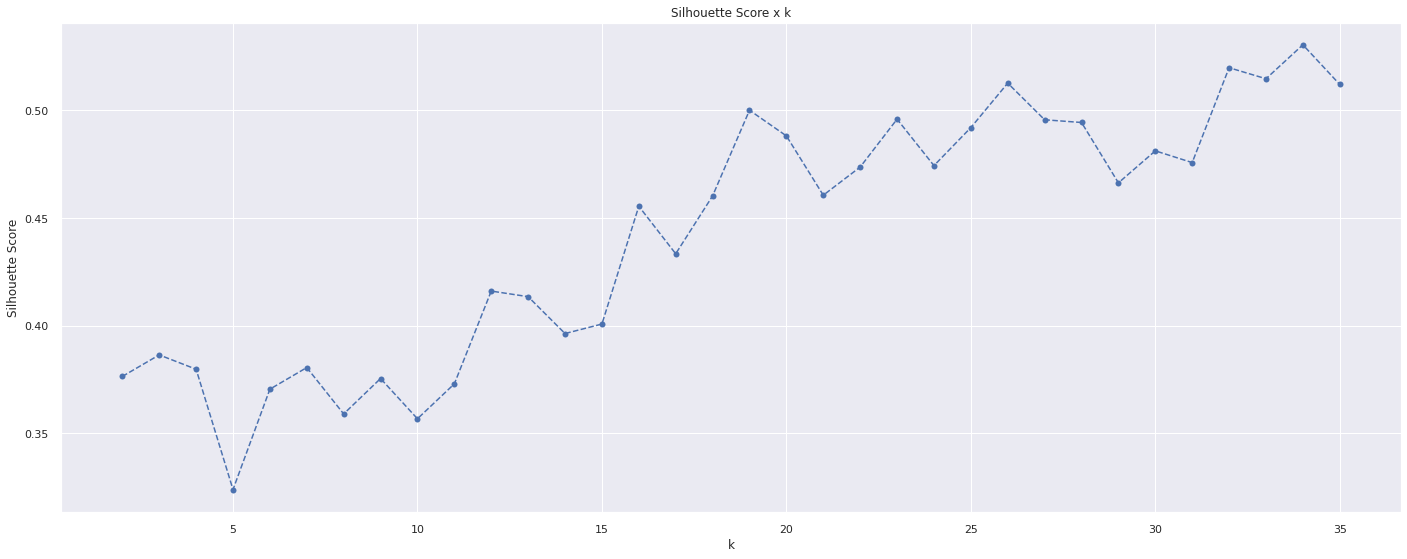

In [ ]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('k');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x k');



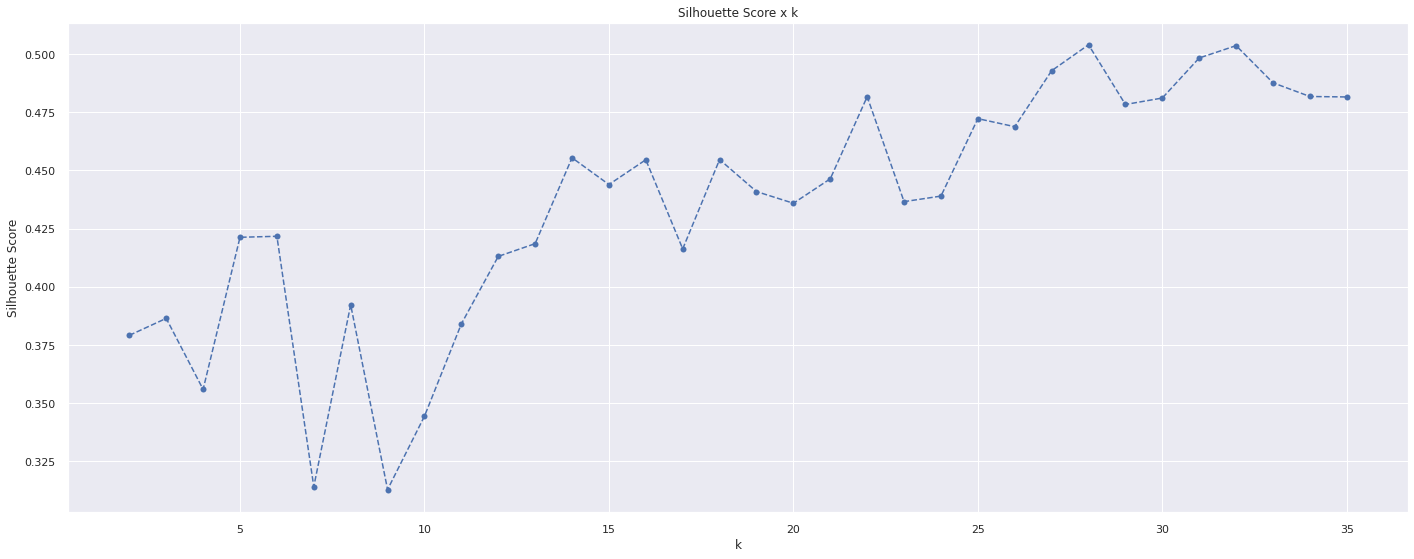

In [ ]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('k');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x k');



#7.3. Hierarchical Clustering

In [ ]:
#7.3. Hierarchical Clustering
from scipy.cluster import hierarchy as hc

# model definition and training


from scipy.cluster    import hierarchy     as hc

hc_model = hc.linkage(X, 'ward')

In [ ]:
hc.dendrogram(
    hc_model,
    leaf_rotation = 90,
    leaf_font_size=8
)

plt.plot()


In [ ]:


hc.dendrogram(
    hc_model,
    truncate_mode='lastp',
    p=12,
    leaf_rotation = 90,
    leaf_font_size=8,
    show_contracted=True
)

plt.plot()



In [ ]:
#7.3.1. HClustering Silhouette Score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import metrics as m
hc_list = []
for k in clusters:
    # model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

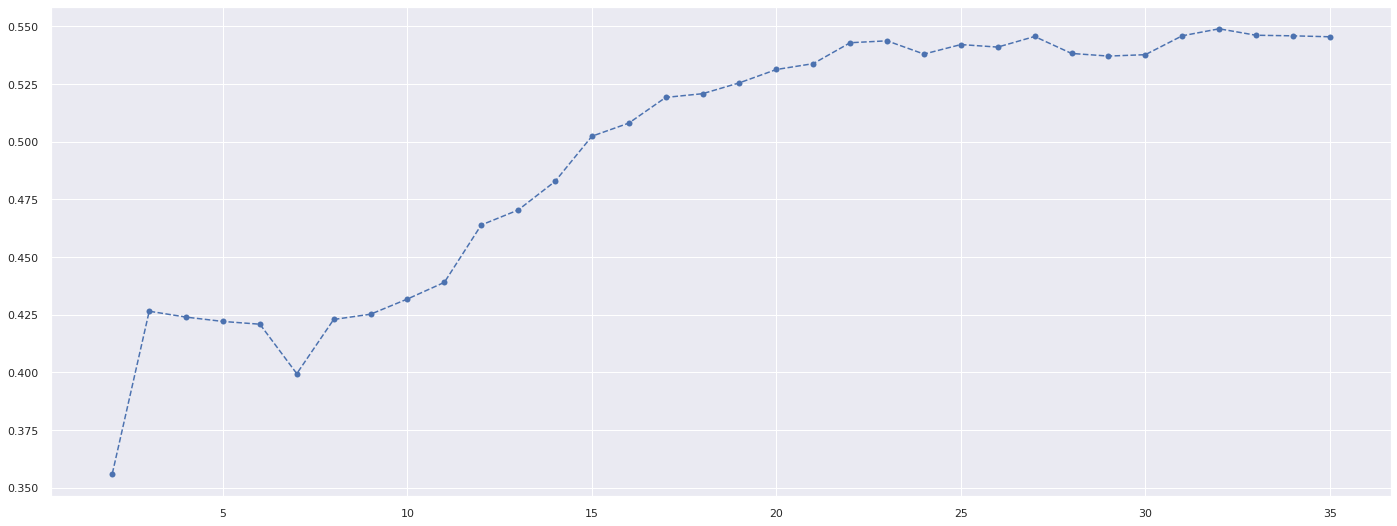

In [ ]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')



In [ ]:

plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')


In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import numpy as np
#7.4. DBSCAN
eps=0.02
min_samples=20

# model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

# model training & predict
labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format( len(np.unique(labels) ) ) )
print( unique(labels))

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = neighbors.kneighbors(X)



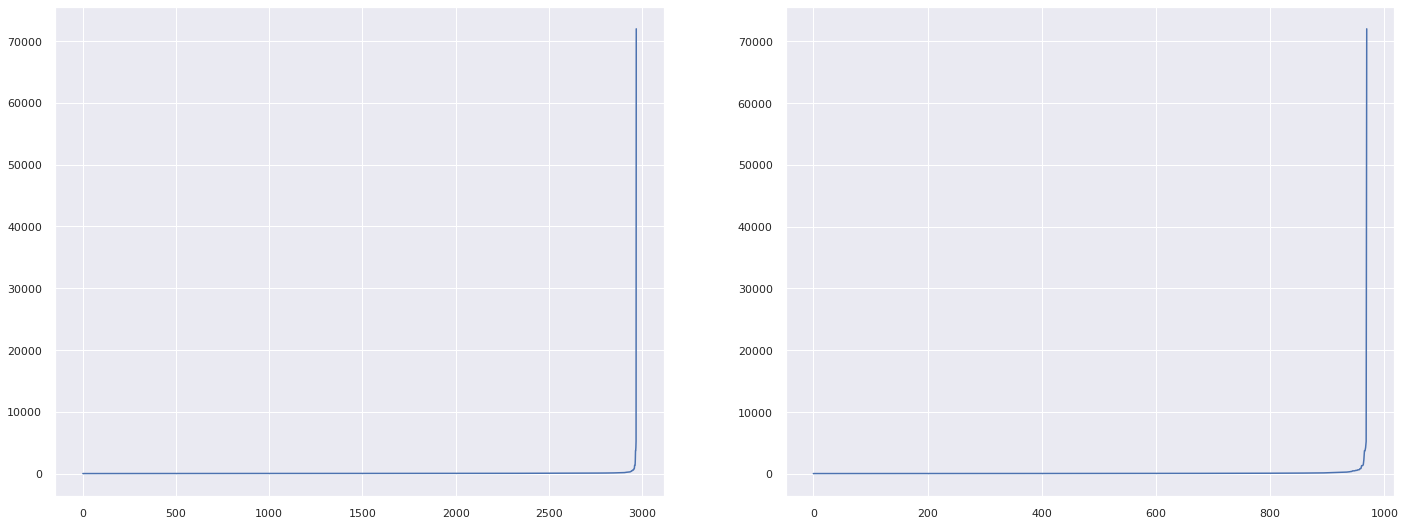

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.subplot(1, 2, 1 )
plt.plot(distances)

###
plt.subplot(1, 2, 2 )
plt.plot(distances[2000:])

In [ ]:


dbscan_list = [0.816064, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]



results

In [ ]:
from sklearn.cluster import DBSCAN

df_results = pd.DataFrame(
    {'KMeans': kmeans_list,
     'GMM': gmm_list,
     'HC': hc_list}
     #'DBSCAN':dbscan_list}  #comentar quando foir df_tree
).T
    
df_results.columns = clusters
#df_results.style.highlight_max(color='yellow', axis=1)



In [ ]:
from sklearn.cluster import DBSCAN

df_results = pd.DataFrame(
    {'KMeans': kmeans_list,
     'GMM': gmm_list,
     'HC': hc_list}
     #'DBSCAN':dbscan_list}  
).T
    
df_results.columns = clusters
#df_results.style.highlight_max(color='yellow', axis=1)



In [ ]:
df_results.style.highlight_max( color= 'lightgreen', axis=1)

,2,3,4,5,6,7
KMeans,0.991343,0.974533,0.744634,0.679110,0.682468,0.575025
GMM,0.991343,0.974533,0.393221,0.068436,-0.074037,0.133220
HC,0.991343,0.977200,0.771689,0.742398,0.559806,0.558909


In [ ]:
df_results.style.highlight_max( color= 'lightgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
KMeans,0.380195,0.448948,0.461575,0.446108,0.438491,0.445631,0.447748,0.445632,0.454669,0.463298,0.469208,0.485236,0.490163,0.501312,0.515011,0.525429,0.533700,0.543152,0.543627,0.554885,0.551435,0.550192,0.556323,0.541207,0.557586,0.559323,0.552518,0.551658,0.558645,0.544304,0.553447,0.563706,0.563594,0.564079
GMM,0.379140,0.386432,0.355926,0.421254,0.421684,0.314153,0.392260,0.312904,0.344416,0.384056,0.413048,0.418520,0.455406,0.443914,0.454557,0.416278,0.454633,0.440894,0.435871,0.446361,0.481643,0.436563,0.438952,0.472215,0.468758,0.492795,0.503929,0.478294,0.481073,0.498261,0.503568,0.487611,0.481724,0.481528
HC,0.356172,0.426506,0.423956,0.422075,0.420881,0.399455,0.422934,0.425215,0.431804,0.439013,0.463867,0.470354,0.482734,0.502329,0.508014,0.519141,0.520759,0.525475,0.531240,0.533781,0.542837,0.543662,0.537924,0.542041,0.540947,0.545537,0.538199,0.537055,0.537656,0.545840,0.548873,0.546081,0.545827,0.545415


 For K = 2. Silhouette Score: 0.9913425427310324
 For K = 3. Silhouette Score: 0.9772000670994258
 For K = 4. Silhouette Score: 0.771688653681121
 For K = 5. Silhouette Score: 0.7423984545419688
 For K = 6. Silhouette Score: 0.5598059825839166
 For K = 7. Silhouette Score: 0.5589088655029274


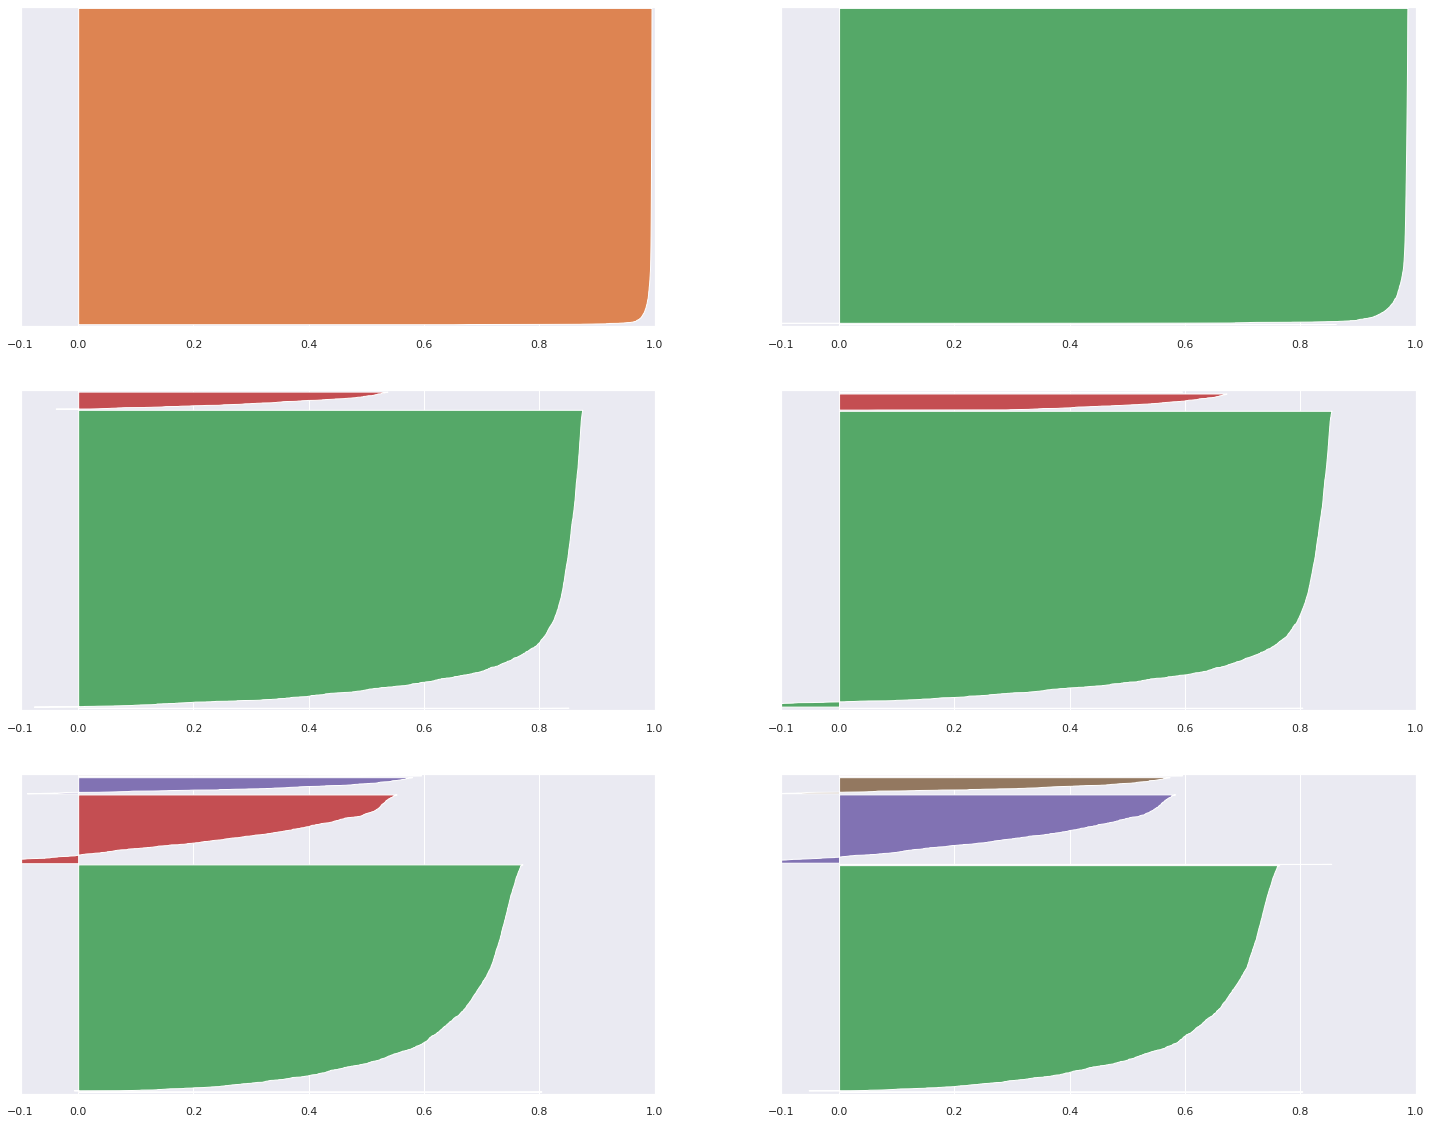

In [ ]:
#SILHOUETTE Analysis

from matplotlib import cm

import umap.umap_ as umap

fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( X, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

MODEL TRAINING

In [ ]:
#8.0. Model Training 
#8.1. K-Means

# model definition
k = 11
#kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
#kmeans.fit( X )

# clustering
#labels = kmeans.labels_

In [ ]:
from sklearn import mixture   
import numpy as np
#from sklearn.mixture import GaussianMixture
from sklearn          import mixture       as mx
import sklearn as sk
from sklearn.cluster import DBSCAN

#8.0. Model Training 
#8.1. K-Means

# model definition
#k = 8
kmeans = mx.GaussianMixture ( n_components=k )
# model training
kmeans.fit( X )

# clustering
labels = kmeans.predict(X)

In [ ]:
from sklearn import metrics as m
#8.2. Clusters Validation

# WSS ( Within-cluter sum of square )
#print( f'WSS Value: { kmeans.inertia_}')

# SS ( Silhouette Score )
print( f'SS Value: { m.silhouette_score( X, labels, metric="euclidean")}')


SS Value: 0.4337618052959442


In [ ]:
X.head()

,embedding_x,embedding_y
0,9.908576,20.240759
1,19.732059,10.182868
2,17.044334,7.803576
3,-5.687453,-1.625992
4,-3.099422,16.960051


In [ ]:
#cluster analysis do tree
df9 = X.copy()
#df62 = df4.copy()
df9['cluster'] = labels
#df6.head()


In [ ]:
df92 = df4.copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size,cluster
0,17850,1176.23,372.0,34.0,1176.23,297.0,3.960370,35.500000,17.000000,40.0,34.595000,0.617647,-1
1,13047,671.36,56.0,9.0,671.36,171.0,3.926082,27.250000,0.028302,35.0,74.595556,11.666667,-1
2,12583,496.59,2.0,15.0,496.59,232.0,2.140474,23.187500,0.040323,50.0,33.106000,7.600000,-1
3,13748,111.90,95.0,5.0,111.90,28.0,3.996429,92.666667,0.017921,0.0,22.380000,4.800000,-1
4,15100,32.85,333.0,3.0,32.85,3.0,10.950000,8.600000,0.073171,22.0,10.950000,0.333333,-1


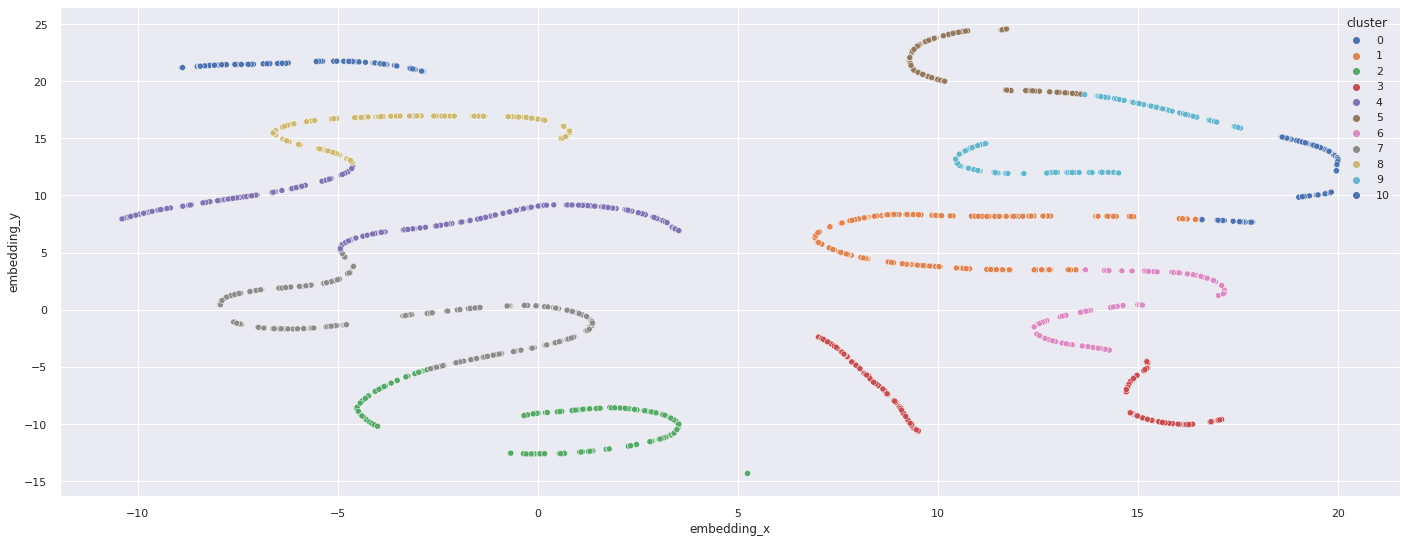

In [ ]:
#df_tree
sns.scatterplot( x= 'embedding_x', y= 'embedding_y', hue= 'cluster', data=df9, palette= 'deep')

In [ ]:
from sklearn import cluster       as c
#9.2. 2d plot
df_viz = df10.drop( columns='customer_id', axis=1 )
#sns.pairplot( df_viz, hue='cluster')


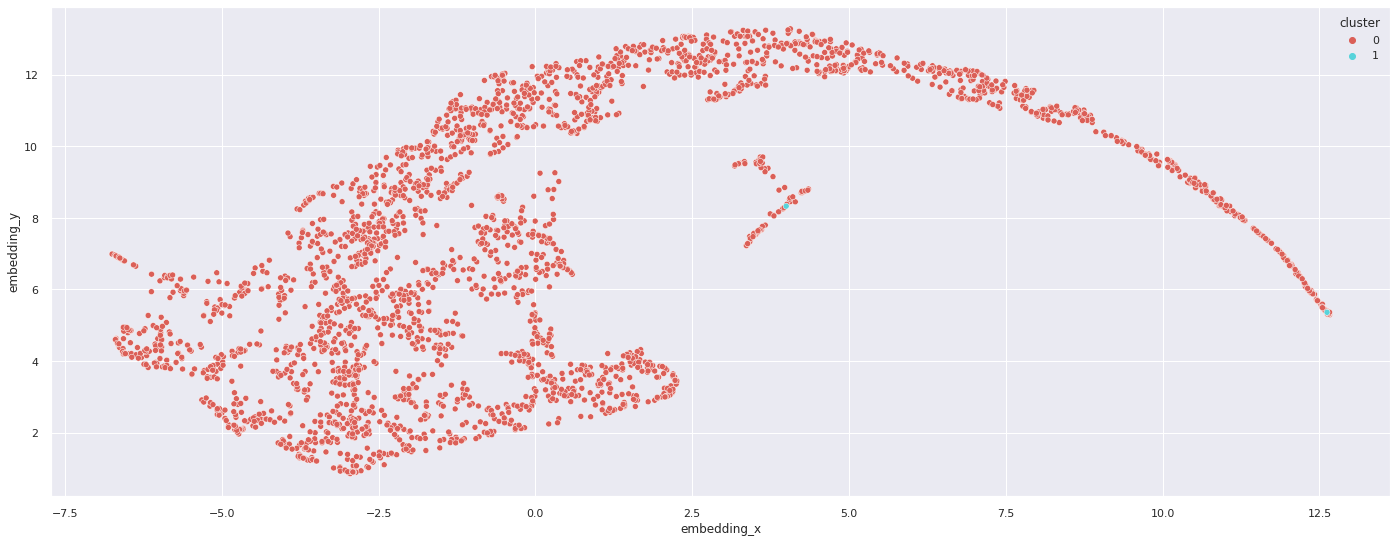

In [ ]:
#9.3. UMAP
#MAchine Learnin-MAnifold

reducer = umap.UMAP( n_neighbors=20, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y',
               hue='cluster',
               palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
               data=df_viz )

In [ ]:

#9.1. Cluster Profile, mudar para df62


# Number of customer
df_cluster = df10[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df10[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recency_days = df10[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Avg invoice_no
#df_products 
#df_qtde_products
df_avg_invoice_no = df10[['qtde_products', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how='inner', on='cluster')
#--------------------------------------df_qtde_products

#frequency
#df_avg_invoice_no # df_frequency = df6[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how='inner', on='cluster')
# ------------------------------------df_frequency

#returns
#df_qtde_returns
df_avg_invoice_no = df10[['qtde_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how='inner', on='cluster')

#df_cluster




In [ ]:
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_products_x,qtde_products_y,qtde_returns
0,0,2966,99.86532,331.330934,64.369858,116.580243,116.580243,33.625084
1,1,4,0.13468,14975.435000,1.500000,4631.250000,4631.250000,21132.250000


Cluster 01:

    Número de customers: 6 (0.14% do customers )
    Recência em média: 7 dias
    Compras em média: 89 compras
    Receita em média: 182.182,00 dólares
    Ticket médio: 254,00 dólares

Cluster 02:

    Número de customers: 28 (0.64 do customers )
    Recência em média: 6 dias
    Compras em média: 57 compras
    Receita em média: 42.614,38 dólares
    Ticket médio: 163,00 dólares

Cluster 03:

    Número de customers: 267 (6% do customers )
    Recência em média: 20 dias
    Compras em média: 19 compras
    Receita em média: 8.089,02 dólares
    Ticket médio: $63,00 dólares


In [ ]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

In [ ]:
sns.distplot(np.log( df5['gross_revenue'] ))

In [ ]:
df5.head()

In [ ]:


mm = pp.MinMaxScaler()

#df4['gross_revenue']          = mm.fit_transform( df4[['gross_revenue']])
df4['recency_days']           = mm.fit_transform( df4[['recency_days']])
df4['qtde_invoices']          = mm.fit_transform( df4[['qtde_invoices']])
df4['qtde_items']             = mm.fit_transform( df4[['qtde_items']])
df4['qtde_products']          = mm.fit_transform( df4[['qtde_products']])
df4['avg_ticket']             = mm.fit_transform( df4[['avg_ticket']])
df4['avg_recency_days']       = mm.fit_transform( df4[['avg_recency_days']])
df4['frequency']              = mm.fit_transform( df4[['frequency']])
df4['qtde_returns']           = mm.fit_transform( df4[['qtde_returns']])
df4['avg_basket_size']        = mm.fit_transform( df4[['avg_basket_size']])
df4['avg_unique_basket_size'] = mm.fit_transform( df4[['avg_unique_basket_size']])

X = df4.copy()



In [ ]:
#feature selection
df6 = df5.copy()
df6_aux = df5.copy()

In [ ]:
mm = pp.MinMaxScaler()
ss = pp.StandardScaler()
rs = pp.RobustScaler()


df6['gross_revenue']          = mm.fit_transform( df6[['gross_revenue']])
#df4['recency_days']           = mm.fit_transform( df4[['recency_days']])
#df4['qtde_invoices']          = mm.fit_transform( df4[['qtde_invoices']])
#df4['qtde_items']             = mm.fit_transform( df4[['qtde_items']])
#df4['qtde_products']          = mm.fit_transform( df4[['qtde_products']])
#df4['avg_ticket']             = mm.fit_transform( df4[['avg_ticket']])
#df4['avg_recency_days']       = mm.fit_transform( df4[['avg_recency_days']])
#df4['frequency']              = mm.fit_transform( df4[['frequency']])
#df4['qtde_returns']           = mm.fit_transform( df4[['qtde_returns']])
#df4['avg_basket_size']        = mm.fit_transform( df4[['avg_basket_size']])
#df4['avg_unique_basket_size'] = mm.fit_transform( df4[['avg_unique_basket_size']])
variable = 'gross_revenue'


In [ ]:
#dados as is
print( 'Min:{} - Max:{}'.format(df6[variable].min(), df6[variable].max() ) )

In [ ]:
df4.head()

In [ ]:
#hyperparameter fine-tunning
X = df6.drop( columns=['customer_id'])

In [ ]:
X.head()

In [ ]:
#2.1. Feature Creation


#dta reference
#df_ref = df1.drop( ['invoice_no', 'stock_code', 'description',
                   #'quantity', 'invoice_date', 'unit_price', 
                   #'country'], axis=1 ).drop_duplicates( ignore_index=True)

# Gross Revenue/Faturamento , quantity + price
#df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] = df2_purchase.loc[:, 'unit_price']

# Gross Revenue/Faturamento , quantity + price
df2['gross_revenue'] = df2['quantity'] = df2['unit_price']

#monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2_purchase['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

df_ref.isna().sum() # -> Check NA apos merge

# ====== ciclo 2 ======

df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
#df_avg_ticket['avg_ticket'] =np.round(df_avg_ticket['avg_ticket'], 2)
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

#returns
#df_avg_ticket = df1[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
#df_avg_ticket['avg_ticket'] =np.round(df_avg_ticket['avg_ticket'], 2)
#df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')


In [ ]:
df_ref.head()

In [ ]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

In [ ]:
#2.1. Feature Creation


#dta reference
df_ref = df1.drop( ['invoice_no', 'stock_code', 'description',
                   'quantity', 'invoice_date', 'unit_price', 
                   'country'], axis=1 ).drop_duplicates( ignore_index=True)

# Gross Revenue/Faturamento , quantity + price
df1['gross_revenue'] = df1['quantity'] = df1['unit_price']

#monetary
df_monetary = df1[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last day purchase
df_recency = df1[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df1['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_freq = df1[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

df_ref.isna().sum() # -> Check NA apos merge

# ====== ciclo 2 ======
df_avg_ticket = df1[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_avg_ticket['avg_ticket'] =np.round(df_avg_ticket['avg_ticket'], 2)
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

df_ref.isna().sum() # -> Check NA apos merge

In [ ]:

#4.0. EDA (Exploratory Data Analysis)
#df3 = df2.copy()
df3 = df_ref.dropna().copy()

In [ ]:
df3.isna().sum()

In [ ]:
##6.0. Feature Selection

df5 = df4.copy()

In [ ]:
# 7.0. Hyperparameter Fine-Tunning
df5.head()

In [ ]:
clusters = [2, 3, 4 , 5, 6]

In [ ]:

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()



In [ ]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer 

#7.3. Silhouette Analysis

fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit( X )
    visualizer.finalize()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()



In [ ]:
##7.1. Within-Cluster Sum of Square(WSS)
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )
    
    # model training
    kmeans.fit( X )
    
    # validation
    wss.append( kmeans.inertia_ )
    
# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel( 'K' );
plt.ylabel( 'Within-Cluster Sum of Square');
plt.title( 'WSS vs K');

In [ ]:
#7.2. silhoutte Score

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()




In [ ]:

#9.1. Visualization Inspection
fig = px.scatter_3d( df6, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
fig.show()



In [ ]:
#9.1. Visualization Inspection
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick')
visualizer.fit( X )
visualizer.finalize()

In [ ]:
import umap.umap_ as umap



In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel